In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import kde

In [3]:
import numpy as np
import pandas as pd
import astropy
from astropy.table import Table, join
from astropy.io import ascii

In [4]:
#d=np.genfromtxt('/disk01/jaird/data/universemachine/dr1/')

dtype = np.dtype(dtype=[('id', 'i8'),('descid','i8'),('upid','i8'),
                        ('flags', 'i4'), ('uparent_dist', 'f4'),
                        ('pos', 'f4', (6)), ('vmp', 'f4'), ('lvmp', 'f4'),
                        ('mp', 'f4'), ('m', 'f4'), ('v', 'f4'), ('r', 'f4'),
                        ('rank1', 'f4'), ('rank2', 'f4'), ('ra', 'f4'),
                        ('rarank', 'f4'), ('A_UV', 'f4'), ('sm', 'f4'), 
                        ('icl', 'f4'), ('sfr', 'f4'), ('obs_sm', 'f4'), 
                        ('obs_sfr', 'f4'), ('obs_uv', 'f4'), ('empty', 'f4')],
                 align=True)
    
    
halos1 = np.fromfile('/disk01/jaird/data/universemachine/dr1/BP/sfr_catalog_1.002310.bin', dtype=dtype)

#Field explanations:
#**Note that halo masses are in Msun/h and stellar masses/SFRs are in Msun.
#ID: Unique halo ID
#DescID: ID of descendant halo (or -1 at z=0).
#UPID: -1 for central halos, otherwise, ID of largest parent halo
#Flags: Mostly internal UniverseMachine info.  However, halos with bit 4 set in the flags (i.e., flags & (2**4) is true) should be ignored.
#Uparent_Dist: Ignore
#pos[6]: (X,Y,Z,VX,VY,VZ)
#X Y Z: halo position (comoving Mpc/h)
#VX VY VZ: halo velocity (physical peculiar km/s)
#M: Halo mass (Bryan & Norman 1998 virial mass, Msun/h)
#V: Halo vmax (physical km/s)
#MP: Halo peak historical mass (BN98 vir, Msun/h)
#VMP: Halo vmax at the time when peak mass was reached.
#R: Halo radius (BN98 vir, comoving kpc/h)
#Rank1: halo rank in Delta_vmax (see UniverseMachine paper)
#Rank2, RA, RARank: Ignore
#A_UV: UV attenuation (mag)
#SM: True stellar mass (Msun)
#ICL: True intracluster stellar mass (Msun)
#SFR: True star formation rate (Msun/yr)
#Obs_SM: observed stellar mass, including random & systematic errors (Msun)
#Obs_SFR: observed SFR, including random & systematic errors (Msun/yr)
#Obs_UV: Observed UV Magnitude (M_1500 AB)

IGNORE_FLAG = 2**4

for x in halos1:
    if (x['flags'] & IGNORE_FLAG):
        continue  #Ignore halos with the IGNORE_FLAG set
#Rest of program logic here:



In [5]:
#creates mask to find values where stellar mass is greater than 10^9
mask = (halos1['sm']>1e9)
#creates new data array for halos with stellar mass >10^9
halos1 = halos1[mask]


In [6]:
#makes a mask to eliminate 0 values in sfr (a requirement to make the contour plot work)


no_0 = np.nonzero(halos1['sfr'])
#no_stu = h9['sfr'][h9['sfr']!=0]

#print(h9['sfr'][np.where(h9['sfr'] ==0)])


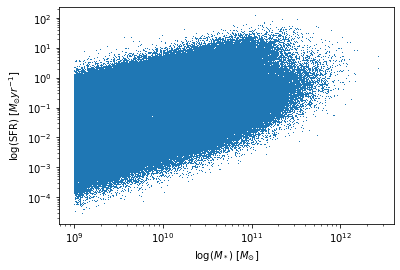

In [6]:
#Plotting the Star formation rate vs stellar mass for first 100,000
h_f5 = halos1[:100000]
h_f1000 = halos1[:1000]
plt.loglog(halos1['sm'], halos1['sfr'], ',')
plt.xlabel('log($M_*$) [$M_{\odot}$]')
plt.ylabel('log(SFR) [$M_{\odot} yr^{-1}$]')
plt.show()

/tmp/ipykernel_2586814/2637495435.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(halos1['sm']), np.log10(halos1['sfr']), ',')


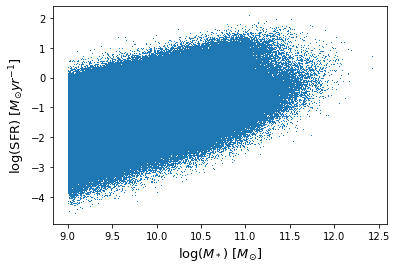

In [7]:
plt.plot(np.log10(halos1['sm']), np.log10(halos1['sfr']), ',')
plt.xlabel('log($M_*$) [$M_{\odot}$]', fontsize='13')
plt.ylabel('log(SFR) [$M_{\odot} yr^{-1}$]', fontsize='13')
plt.show()

Text(0.02, 0.5, 'log(SFR) [$M_{\\odot} yr^{-1}$]')

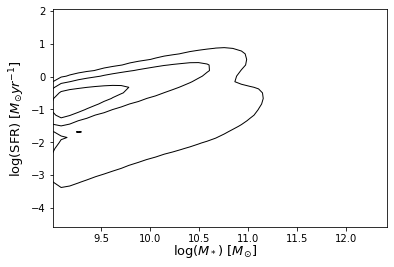

In [46]:
#plotting contour

def contour(ax,x,y,levels=[0.95,0.83,0.50],
            xrange=None,yrange=None,fill=False,
            linewidths=1.0,linestyles='-',
            colors='k',label=None,**kwargs):
    '''
    Makes a countour plot out of x and y scatter data
    Inputs:
    ax - matplotlib axis object to plot on
    x,y - scatter data
    Optional inputs:
    levels - list of the fraction of points to enclose by contours (default=[0.95,0.83,0.5])
    xrange, yrange - fixes range used for contours (defaults to min-to-max of x or y)
    colors, linewidths, linestyles
    '''
    from scipy.stats import kde
    if xrange is None:
        xrange=[np.min(x),np.max(x)]
    if yrange is None:
        yrange=[np.min(y),np.max(y)]
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[xrange[0]:xrange[1]:40j, yrange[0]:yrange[1]:40j]
    zi = k([xi.ravel(),yi.ravel()])
    if fill:
        ax.contourf(xi, yi, zi.reshape(xi.shape)/zi.max(),
                    levels=1-np.flip(np.sort(np.array(levels))),
                     colors=colors,**kwargs)
    else:
        ax.contour(xi, yi, zi.reshape(xi.shape)/zi.max(),
                   levels=1-np.flip(np.sort(np.array(levels))),
                   linewidths=linewidths,linestyles=linestyles,
                   colors=colors,**kwargs)
    if label is not None:
        ax.plot([-999],[-999],color=colors,label=label,linewidth=linewidths,
                linestyle=linestyles,**kwargs)

        

fig, ax = plt.subplots()
contour = contour(ax, np.log10(halos1['sm'][no_0]), np.log10(halos1['sfr'][no_0]))
#ax.set_title('Contour plot of SFR vs SM')
fig.supxlabel('log($M_*$) [$M_{\odot}$]', fontsize='13')
fig.supylabel('log(SFR) [$M_{\odot} yr^{-1}$]', fontsize='13')



/tmp/ipykernel_1949006/2324032552.py:8: RuntimeWarning: divide by zero encountered in log10
  dsfr = np.log10(halos1['sfr']) - log_sfrcut
/tmp/ipykernel_1949006/2324032552.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(halos1['sm'][qu]), np.log10(halos1['sfr'][qu]),'r,')


[]

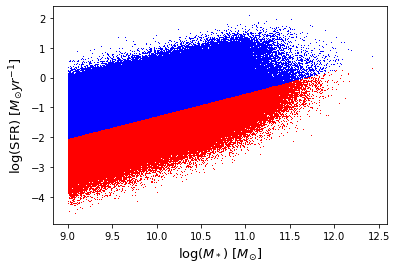

In [7]:
#separating quiescent and star-forming galaxies and plotting them

#finding redshift (hard-coded)
z = 0
#the line from Aird(2021)
log_sfrcut = -8.9 + 0.76*np.log10(halos1['sm']) + 2.95*np.log10(1+z)
#finding the difference in y(sfr) value from line
dsfr = np.log10(halos1['sfr']) - log_sfrcut

#sf is when this difference is positive and qu is when this difference is negative
sf = (dsfr >=0.0)
qu = (dsfr<0.0)

plt.plot(np.log10(halos1['sm'][qu]), np.log10(halos1['sfr'][qu]),'r,')
plt.plot(np.log10(halos1['sm'][sf]), np.log10(halos1['sfr'][sf]), 'b,')
plt.xlabel('log($M_*$) [$M_{\odot}$]', fontsize='13')
plt.ylabel('log(SFR) [$M_{\odot} yr^{-1}$]', fontsize='13')
#leg = plt.legend(['Quiescent', 'Star-forming'])
#leg.draw_frame(False)

plt.plot()
 


[ 0.25323675 -0.44463136  0.03624304 ...  0.17969354  0.24684928
  1.04974829]


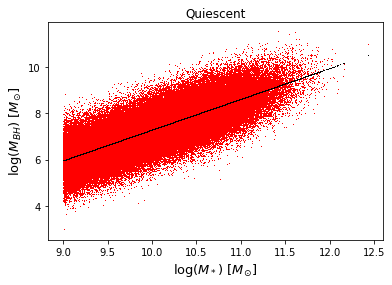

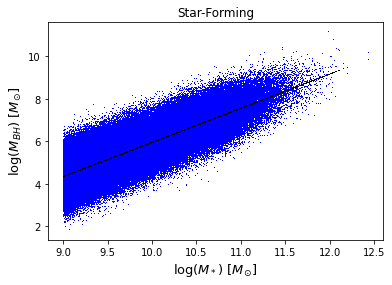

In [8]:
#setting a seed to get the same random numbers every time
seed = 8942
rng = np.random.default_rng(seed)

qu_scatter = rng.normal(0, 0.65, size=(halos1['sm'][qu].shape))
sf_scatter = rng.normal(0, 0.60, size=(halos1['sm'][sf].shape))
print(qu_scatter)

#qu_scatter = np.random.normal(0, 0.65, size=(h9['sm'][qu].shape))
#sf_scatter = np.random.normal(0, 0.60, size=(h9['sm'][sf].shape))


log_bhm_qu = 7.89 + 1.33*np.log10((halos1['sm'][qu])/3E10) + qu_scatter
line_qu = 7.89 + 1.33*np.log10((halos1['sm'][qu])/3E10)
plt.plot(np.log10((halos1['sm'][qu])), log_bhm_qu, 'r,')
plt.plot(np.log10((halos1['sm'][qu])), line_qu, 'k,')
plt.ylabel('log($M_{BH}$) [$M_{\odot}$]', fontsize='13')
plt.xlabel('log($M_*$) [$M_{\odot}$]', fontsize='13')
plt.title('Quiescent')
plt.show()

log_bhm_sf = 6.70 + 1.61*np.log10((halos1['sm'][sf])/3E10) + sf_scatter
line_sf = 6.70 + 1.61*np.log10((halos1['sm'][sf])/3E10)
plt.plot(np.log10((halos1['sm'][sf])), log_bhm_sf, 'b,')
plt.plot(np.log10((halos1['sm'][sf])),line_sf, 'k,')
plt.ylabel('log($M_{BH}$) [$M_{\odot}$]', fontsize='13')
plt.xlabel('log($M_*$) [$M_{\odot}$]', fontsize='13')
plt.title('Star-Forming')
plt.show()


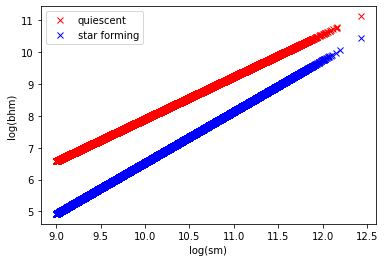

[ 2674016.35865184 15156700.62467786  6692124.14844792 ...
  3593364.77010766  1596849.46911188 14774412.98634594] [1.49241655e+09 2.37904454e+04 2.27559420e+06 ... 3.64354965e+05
 4.12472087e+04 3.60954867e+04]


In [9]:
#plotting black hole mass lines from Greene(2020) and assinging corresponding bh masses

log_bhm_qu_line = 7.89 + 1.33*np.log10((halos1['sm'][qu])/3E10) + 0.65
plt.plot(np.log10((halos1['sm'][qu])), log_bhm_qu_line, 'rx')
log_bhm_sf_line = 6.70 + 1.61*np.log10((halos1['sm'][sf])/3E10) + 0.60
plt.plot(np.log10((halos1['sm'][sf])), log_bhm_sf_line, 'bx')
plt.legend(['quiescent', 'star forming'])
plt.ylabel('log(bhm)')
plt.xlabel('log(sm)')
plt.show()

bhm_qu = 10**(log_bhm_qu)
bhm_sf = 10**(log_bhm_sf)
print(bhm_qu, bhm_sf)

In [48]:
#making an astropy table for the data, adding a bh mass column and filling it

table1 = astropy.table.Table(halos1)

table1.add_column(0.0, name='bhm')

table1['bhm'][qu] = bhm_qu
table1['bhm'][sf] = bhm_sf

print(table1)




        id         descid    upid    flags uparent_dist ...    obs_sfr       obs_uv     empty          bhm        
------------------ ------ ---------- ----- ------------ ... ------------- ----------- --------- ------------------
        2809272603     -1         -1     0          2.0 ...      1.190755  -18.056082       1.0 1492416547.9362862
135000000342075929     -1 2809272603     8    0.4496574 ...   0.007972691  -12.862732       1.0  2674016.358651842
126000000542313423     -1 2809272603     8   0.21343602 ...    0.02560087  -14.591309       1.0  15156700.62467786
130000000451936165     -1 2809272603     8    0.5797555 ... 0.00030628307  -11.849489       1.0  6692124.148447921
125000000565082351     -1 2809272603     8   0.22581989 ...   0.073120385   -15.37146       1.0  7505579.601854271
143000000183933471     -1 2809272603     8  0.024079299 ...    0.29013598  -16.455242       1.0 23790.445390575183
 55000001985444267     -1 2809272603     8    0.5887113 ...     0.7247413  -17.4

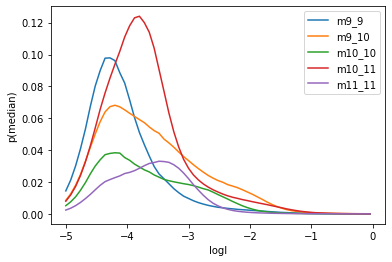

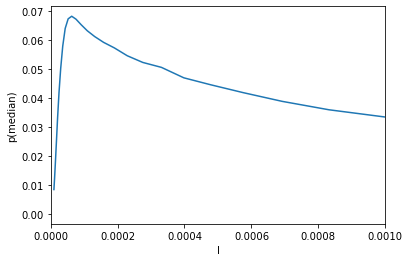

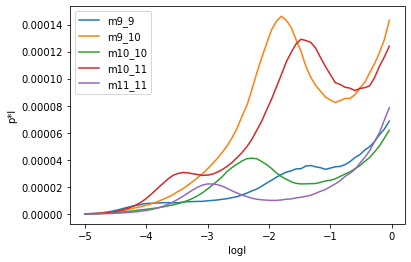

0.00010533550159376202
0.0003111577445508928
0.00010799141324579573
0.00028891479540058717
8.380991101361816e-05
0.08000000000000007


In [46]:
#opening the probability data
file = open('pledd_qu.txt')

#turning the data into an astropy table
probs = astropy.table.Table(np.loadtxt(file), names=['z_lo', 'z_hi', 'mass_lo', 'mass_hi', 'logl', 'p(median)', 'p_lolim(90%CL)', 'p_uplim(90%CL)', 'flag'])

#creating mask to extract only the redshift 0.1-0.5 data, and mass 9.0-9.5 data
z0 = (probs['z_lo'] == 0.1)

#creating mask to limit log(lambda) to less than (0 or 1 ???)
log1 = (probs['logl'] < 0)

#creating masks to extract the different mass ranges
mp9_9 = (probs['mass_lo'] == 9.0)
mp9_10 = (probs['mass_lo'] == 9.5)
mp10_10 = (probs['mass_lo'] == 10.0)
mp10_11 = (probs['mass_lo'] == 10.5)
mp11_11 = (probs['mass_lo'] == 11.0)

#creating different bins for the different mass ranges
bin0 = z0 & mp9_9 & log1
bin1 = z0 & mp9_10 & log1
bin2 = z0 & mp10_10 & log1
bin3 = z0 & mp10_11 & log1
bin4 = z0 & mp11_11 & log1
#print(probs['logl'][bin1])

#trying to find the expectation value of lamda
import scipy.integrate as integrate
#print(probs['logl'][bin])
# x = p(median)*lambda   l = lambda
x = (10**(probs['logl'][bin1]))*probs['p(median)'][bin1]
l = 10**(probs['logl'][bin1])

#separating p(median) for the different mass mins
p_l0 = probs['p(median)'][bin0]
p_l1 = probs['p(median)'][bin1]
p_l2 = probs['p(median)'][bin2]
p_l3 = probs['p(median)'][bin3]
p_l4 = probs['p(median)'][bin4]
d = np.log10(l)


#plotting p(lambda) against log10(lambda)
plt.plot(probs['logl'][bin1], p_l0)
plt.plot(probs['logl'][bin1], p_l1)
plt.plot(probs['logl'][bin1], p_l2)
plt.plot(probs['logl'][bin1], p_l3)
plt.plot(probs['logl'][bin1], p_l4)
plt.legend(['m9_9', 'm9_10', 'm10_10', 'm10_11', 'm11_11'])
plt.xlabel('logl')
plt.ylabel('p(median)')
plt.show()

#plotting p(lambda) against lambda
plt.plot(l, probs['p(median)'][bin1])
plt.xlabel('l')
plt.ylabel('p(median)')
plt.xlim([0,0.001])
plt.show()

#plotting log10(lambda*p(lambda)) against log10(lambda)
plt.plot(probs['logl'][bin1], l*p_l0)
plt.plot(probs['logl'][bin1], l*p_l1)
plt.plot(probs['logl'][bin1], l*p_l2)
plt.plot(probs['logl'][bin1], l*p_l3)
plt.plot(probs['logl'][bin1], l*p_l4)
plt.legend(['m9_9', 'm9_10', 'm10_10', 'm10_11', 'm11_11'])
plt.xlabel('logl')
plt.ylabel('p*l')
plt.show()

#integration method
#exp_l2 = integrate.simps(l*p_l, d)
#print(exp_l2)

#method james said in email
dloglambda = probs['logl'][1] - probs['logl'][0]
exp_l0 = np.sum(l*p_l0)*dloglambda
exp_l1 = np.sum(l*p_l1)*dloglambda
exp_l2 = np.sum(l*p_l2)*dloglambda
exp_l3 = np.sum(l*p_l3)*dloglambda
exp_l4 = np.sum(l*p_l4)*dloglambda
print(exp_l0)
print(exp_l1)
print(exp_l2)
print(exp_l3)
print(exp_l4)
print(dloglambda)



file.close()

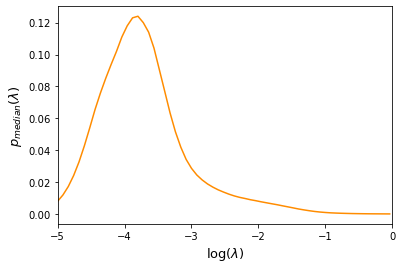

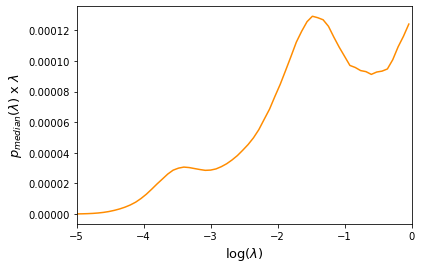

In [47]:
#probability distribution plots for report

plt.plot(probs['logl'][bin3], p_l3, 'darkorange')
plt.xlabel('log($\lambda$)', fontsize='13')
plt.ylabel('$p_{median}(\lambda)$', fontsize='13')
plt.xlim(-5, 0)
plt.show()


plt.plot(probs['logl'][bin3], l*p_l3, 'darkorange')
plt.xlabel('log($\lambda$)', fontsize='13')
plt.ylabel('$p_{median}(\lambda)$ x $\lambda$', fontsize='13')
plt.xlim(-5, 0)
plt.show()




In [49]:
#create new bins for h9

m9_9 = (halos1['sm'] <= 10**(9.5))
m9_10 = (halos1['sm'] > 10**(9.5)) & (halos1['sm'] <= (1e10))
m10_10 = (halos1['sm'] > (1e10)) & (halos1['sm'] <= 10**(10.5))
m10_11 = (halos1['sm'] > 10**10.5) & (halos1['sm'] <= 1e11)
m11_11 = (halos1['sm'] > 1e11)


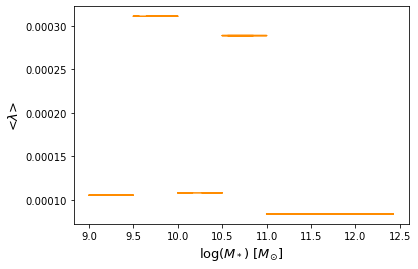

In [50]:
#finding out why the bhmgr jumps in places
l0_array = np.full((halos1['sm'][m9_9].shape), exp_l0)
l1_array = np.full((halos1['sm'][m9_10].shape), exp_l1)
l2_array = np.full((halos1['sm'][m10_10].shape), exp_l2)
l3_array = np.full((halos1['sm'][m10_11].shape), exp_l3)
l4_array = np.full((halos1['sm'][m11_11].shape), exp_l4)

plt.plot(np.log10(halos1['sm'][m9_9]), l0_array, 'darkorange')
plt.plot(np.log10(halos1['sm'][m9_10]), l1_array, 'darkorange')
plt.plot(np.log10(halos1['sm'][m10_10]), l2_array, 'darkorange')
plt.plot(np.log10(halos1['sm'][m10_11]), l3_array, 'darkorange')
plt.plot(np.log10(halos1['sm'][m11_11]), l4_array, 'darkorange')
#plt.legend(['m9_9', 'm9_10', 'm10_10', 'm10_11', 'm11_11'])
plt.xlabel('log($M_*$) [$M_{\odot}$]', fontsize='13')
plt.ylabel('<$\lambda$>', fontsize='13')
plt.show()
#could try and fit exp_l to make a continuous function to stop all the jumping

In [51]:
#adds this Lbol into halos data table

table1.add_column(0.0, name='Lbol')


#finds Lbol for all bins and adds them to the halos table

#print(table)
bol9_9 = exp_l0*0.002*np.multiply((1.3E38),(halos1['sm'][m9_9]), dtype=np.float64)
bol9_10 = exp_l1*0.002*np.multiply((1.3E38),(halos1['sm'][m9_10]), dtype=np.float64)
bol10_10 = exp_l2*0.002*np.multiply((1.3E38),(halos1['sm'][m10_10]), dtype=np.float64)
bol10_11 = exp_l3*0.002*np.multiply((1.3E38),(halos1['sm'][m10_11]), dtype=np.float64)
bol11_11 = exp_l4*0.002*np.multiply((1.3E38),(halos1['sm'][m11_11]), dtype=np.float64)
table1['Lbol'][m9_9] = bol9_9
table1['Lbol'][m9_10] = bol9_10
table1['Lbol'][m10_10] = bol10_10
table1['Lbol'][m10_11] = bol10_11
table1['Lbol'][m11_11] = bol11_11
#print(table)


In [35]:
print(table1)

        id         descid    upid    flags ...    obs_uv     empty          bhm                  Lbol         
------------------ ------ ---------- ----- ... ----------- --------- ------------------ ----------------------
        2809272603     -1         -1     0 ...  -18.056082       1.0 1492416547.9362862 3.3538560135442754e+43
135000000342075929     -1 2809272603     8 ...  -12.862732       1.0  2674016.358651842 1.0828665963124467e+41
126000000542313423     -1 2809272603     8 ...  -14.591309       1.0  15156700.62467786 1.2060409163255892e+42
130000000451936165     -1 2809272603     8 ...  -11.849489       1.0  6692124.148447921 6.9286596468500636e+41
125000000565082351     -1 2809272603     8 ...   -15.37146       1.0  7505579.601854271 5.0436174898354756e+42
143000000183933471     -1 2809272603     8 ...  -16.455242       1.0 23790.445390575183  2.183796528326528e+41
 55000001985444267     -1 2809272603     8 ...  -17.448164       1.0  2275594.197793543 1.7828051688883256e+42
 

In [52]:
#finding black hole mass growth rate and adding it to the table
constant = 3.154/(1.98847e30*(3e8**2)*0.1)
print(constant)
bhmgr = table1['Lbol']*constant

table1.add_column(0.0, name='bhmgr')
table1['bhmgr'] = bhmgr
print(table1)

1.762382356507488e-46
        id         descid    upid    flags ...        bhm                  Lbol                  bhmgr         
------------------ ------ ---------- ----- ... ------------------ ---------------------- ----------------------
        2809272603     -1         -1     0 ... 1492416547.9362862 1.0033506213243396e+43  0.0017682874324128418
135000000342075929     -1 2809272603     8 ...  2674016.358651842 4.2110409173480196e+40  7.421464215265256e-06
126000000542313423     -1 2809272603     8 ...  15156700.62467786  5.326148742843678e+41  9.386710572522235e-05
130000000451936165     -1 2809272603     8 ...  6692124.148447921 3.6099172382642394e+41  6.362054449169132e-05
125000000565082351     -1 2809272603     8 ...  7505579.601854271  2.784908735431604e+42  0.0004908074019808239
143000000183933471     -1 2809272603     8 ... 23790.445390575183  8.492326356045582e+40  1.496672613559826e-05
 55000001985444267     -1 2809272603     8 ...  2275594.197793543  7.8732697875121

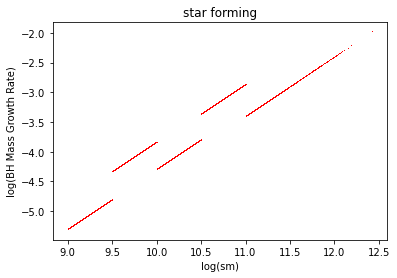

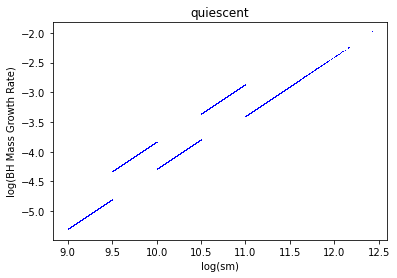

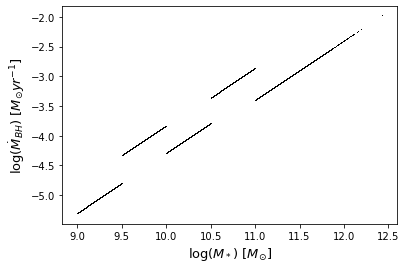

In [53]:
#plotting black hole mass growth rate as a function of stellar mass

plt.plot(np.log10(table1['sm'][sf]), np.log10(table1['bhmgr'][sf]), 'r,')
plt.xlabel('log(sm)')
plt.ylabel('log(BH Mass Growth Rate)')
plt.title('star forming')
plt.show()

plt.plot(np.log10(table1['sm'][qu]), np.log10(table1['bhmgr'][qu]), 'b,')
plt.xlabel('log(sm)')
plt.ylabel('log(BH Mass Growth Rate)')
plt.title('quiescent')
plt.show()

plt.plot(np.log10(table1['sm']), np.log10(table1['bhmgr']), 'k,')
plt.xlabel('log($M_*$) [$M_{\odot}$]', fontsize='13')
plt.ylabel('log($\dot{M}_{BH}$) [$M_{\odot} yr^{-1}$]', fontsize='13')
#plt.title('star forming')
plt.show()

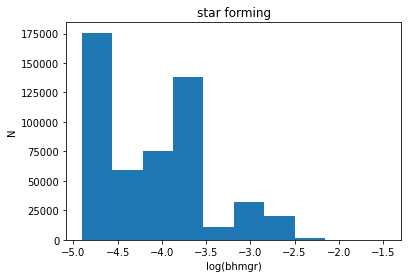

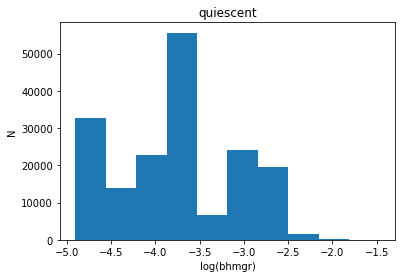

In [19]:
plt.hist(np.log10(table1['bhmgr'][sf]))
plt.xlabel('log(bhmgr)')
plt.title('star forming')
plt.ylabel('N')
plt.show()

plt.hist(np.log10(table1['bhmgr'][qu]))
plt.xlabel('log(bhmgr)')
plt.title('quiescent')
plt.ylabel('N')
plt.show()

In [20]:
#finding the next snapshot back
#d=np.genfromtxt('/disk01/jaird/data/universemachine/dr1/')

dtype = np.dtype(dtype=[('id', 'i8'),('descid','i8'),('upid','i8'),
                        ('flags', 'i4'), ('uparent_dist', 'f4'),
                        ('pos', 'f4', (6)), ('vmp', 'f4'), ('lvmp', 'f4'),
                        ('mp', 'f4'), ('m', 'f4'), ('v', 'f4'), ('r', 'f4'),
                        ('rank1', 'f4'), ('rank2', 'f4'), ('ra', 'f4'),
                        ('rarank', 'f4'), ('A_UV', 'f4'), ('sm', 'f4'), 
                        ('icl', 'f4'), ('sfr', 'f4'), ('obs_sm', 'f4'), 
                        ('obs_sfr', 'f4'), ('obs_uv', 'f4'), ('empty', 'f4')],
                 align=True)
    
    
halos994717 = np.fromfile('/disk01/jaird/data/universemachine/dr1/BP/sfr_catalog_0.994717.bin', dtype=dtype)

#Field explanations:
#**Note that halo masses are in Msun/h and stellar masses/SFRs are in Msun.
#ID: Unique halo ID
#DescID: ID of descendant halo (or -1 at z=0).
#UPID: -1 for central halos, otherwise, ID of largest parent halo
#Flags: Mostly internal UniverseMachine info.  However, halos with bit 4 set in the flags (i.e., flags & (2**4) is true) should be ignored.
#Uparent_Dist: Ignore
#pos[6]: (X,Y,Z,VX,VY,VZ)
#X Y Z: halo position (comoving Mpc/h)
#VX VY VZ: halo velocity (physical peculiar km/s)
#M: Halo mass (Bryan & Norman 1998 virial mass, Msun/h)
#V: Halo vmax (physical km/s)
#MP: Halo peak historical mass (BN98 vir, Msun/h)
#VMP: Halo vmax at the time when peak mass was reached.
#R: Halo radius (BN98 vir, comoving kpc/h)
#Rank1: halo rank in Delta_vmax (see UniverseMachine paper)
#Rank2, RA, RARank: Ignore
#A_UV: UV attenuation (mag)
#SM: True stellar mass (Msun)
#ICL: True intracluster stellar mass (Msun)
#SFR: True star formation rate (Msun/yr)
#Obs_SM: observed stellar mass, including random & systematic errors (Msun)
#Obs_SFR: observed SFR, including random & systematic errors (Msun/yr)
#Obs_UV: Observed UV Magnitude (M_1500 AB)

IGNORE_FLAG = 2**4

for x in halos994717:
    if (x['flags'] & IGNORE_FLAG):
        continue  #Ignore halos with the IGNORE_FLAG set
#Rest of program logic here:

In [21]:
#creates mask to find values where stellar mass is greater than 10^9
mask = (halos994717['sm']>1e9)
#creates new data array for halos with stellar mass >10^9
halos994717 = halos994717[mask]

In [22]:
from astropy.cosmology import Planck15
from astropy import units as u

In [23]:
#finding lookback time and converting it into a dimensionless quantity to allow for subraction but also converting it into years
z = (1/0.994717) - 1
time_Gyr = astropy.cosmology.Planck15.lookback_time(z)
print(time_Gyr)
print(repr(time_Gyr))
time = time_Gyr *1e9/u.Gyr
print(time)

0.0763654146480441 Gyr
<Quantity 0.07636541 Gyr>
76365414.6480441


In [24]:
#finding matching ids

#note minus sign so sorts from high to low mass
sort = np.argsort(-halos994717['mp'])         

#sorted version of halos earlier
halos994717_sorted= halos994717[sort]          

#returns first match from halos_earlier_sorted to halos_later i.e. most massive progenitor
matches, ind_earlier, ind_later = np.intersect1d(halos994717_sorted['descid'], halos1['id'], return_indices=True)
#print(ind_earlier[0], ind_later[0])

#then can add BH mass to halos_earlier_sorted, for the most massive progenitor
table994717 = astropy.table.Table(halos994717_sorted)
table994717.add_column(0.0, name='bhm')
table994717['bhm'][ind_earlier] = table1['bhm'][ind_later] - table1['bhmgr'][ind_later]*time
#print(table1['bhm'][489050], table['bhm'][58762], table['bhmgr'][58762n[])


#print(table1['bhm'])
print(table994717)
pos = (table994717['bhm'] > 0)
print(np.amax(table994717['bhm']), np.amin(table994717['bhm'][pos]))
print(np.amax(table1['bhm']), np.amin(table1['bhm']))

        id               descid          upid    flags ...   obs_sfr      obs_uv   empty        bhm        
------------------ ------------------ ---------- ----- ... ------------ ---------- ----- ------------------
        2798830672         2811886267         -1   130 ...     3.028177 -19.496168   1.0  91436391347.17653
        2796286686         2809372245         -1   130 ...    5.9309945 -19.708029   1.0 15347062048.578966
        2798850500         2811905606         -1   130 ...    1.1387824   -18.7556   1.0  22899280992.91912
        2803078137         2816085895         -1   130 ...    0.6569075 -18.271914   1.0  2892191564.037433
        2802920468         2815930296         -1   130 ...    0.5416507  -18.08791   1.0 1652741648.0316267
        2799072539         2812124832         -1   130 ...    1.2486084 -18.510786   1.0 10444603775.391853
        2806808674         2819773896         -1   130 ...    26.933014 -20.794136   1.0 23462136543.626045
        2799014574         2

/tmp/ipykernel_1124081/1000403066.py:5: RuntimeWarning: divide by zero encountered in log10
  dsfr = np.log10(table994717['sfr']) - log_sfrcut


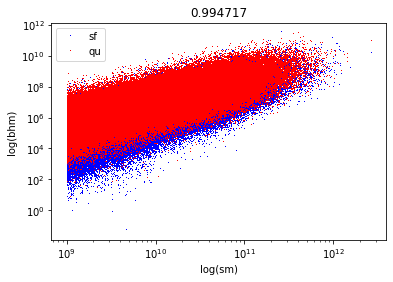

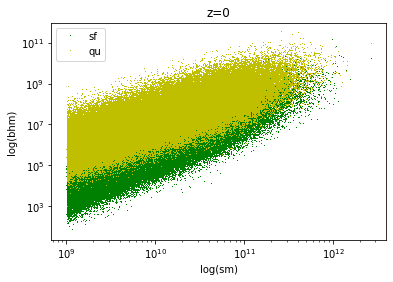

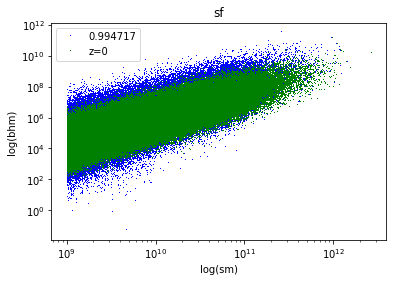

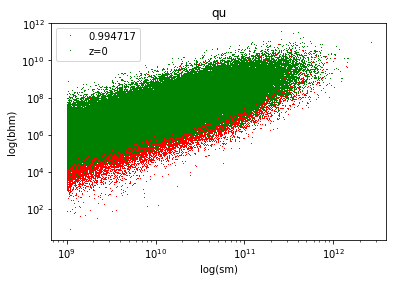

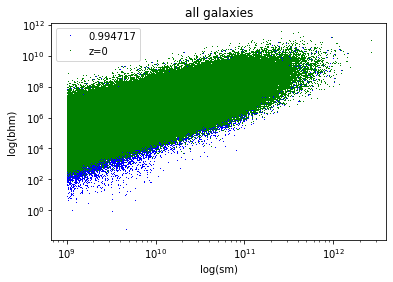

In [25]:
z = (1/0.994717) - 1
#the line from Aird(2021)
log_sfrcut = -8.9 + 0.76*np.log10(table994717['sm']) + 2.95*np.log10(1+z)
#finding the difference in y(sfr) value from line
dsfr = np.log10(table994717['sfr']) - log_sfrcut

#sf is when this difference is positive and qu is when this difference is negative
sf1 = (dsfr >=0.0)
qu1 = (dsfr<0.0)

plt.loglog(table994717['sm'][sf1],  table994717['bhm'][sf1],'b,')
plt.loglog(table994717['sm'][qu1], table994717['bhm'][qu1], 'r,')
plt.xlabel('log(sm)')
plt.ylabel('log(bhm)')
plt.legend(['sf','qu'])
plt.title('0.994717')
plt.show()

plt.loglog(table1['sm'][sf],  table1['bhm'][sf],'g,')
plt.loglog(table1['sm'][qu], table1['bhm'][qu], 'y,')
plt.xlabel('log(sm)')
plt.ylabel('log(bhm)')
plt.legend(['sf','qu'])
plt.title('z=0')
plt.show()

plt.loglog(table994717['sm'][sf1],  table994717['bhm'][sf1],'b,')
plt.loglog( table1['sm'][sf], table1['bhm'][sf],'g,')
plt.xlabel('log(sm)')
plt.ylabel('log(bhm)')
plt.title('sf')
plt.legend(['0.994717','z=0'])
plt.show()

plt.loglog(table994717['sm'][qu1], table994717['bhm'][qu1], 'r,')
plt.loglog(table1['sm'][qu], table1['bhm'][qu], 'g,')
plt.xlabel('log(sm)')
plt.ylabel('log(bhm)')
plt.title('qu')
plt.legend(['0.994717','z=0'])
plt.show()

plt.loglog(table994717['sm'],  table994717['bhm'],'b,')
plt.loglog(table1['sm'], table1['bhm'], 'g,')
plt.xlabel('log(sm)')
plt.ylabel('log(bhm)')
plt.legend(['0.994717','z=0'])
plt.title('all galaxies')
plt.show()




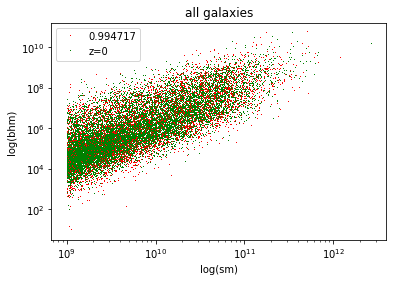

In [26]:
rand = np.random.choice(len(table994717['sm']), 10000, replace=False)

plt.loglog(table994717['sm'][rand],  table994717['bhm'][rand],'r,')
plt.loglog(table1['sm'][:10000], table1['bhm'][:10000], 'g,')
plt.xlabel('log(sm)')
plt.ylabel('log(bhm)')
plt.legend(['0.994717','z=0'])
plt.title('all galaxies')
plt.show()

In [27]:
pos = (table994717['bhm'] > 0)
no_0_2 = (table994717['bhm'] != 0)
nonetype = no_0_2 & pos
no_0_3 = (table1['bhm'] !=0)

In [28]:
print(np.where(np.log10(table994717['sm'][nonetype]) == None))
print(np.where(np.log10(table994717['bhm'][nonetype]) == None))
print(np.where(ax == None))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


Text(0.02, 0.5, 'log(BHM)')

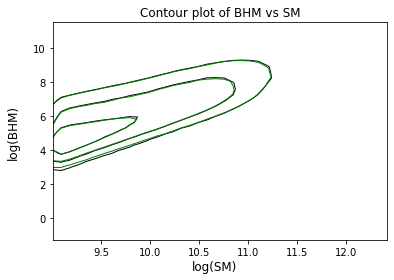

In [29]:
def contour2(ax,x,y,levels=[0.95,0.83,0.50],
            xrange=None,yrange=None,fill=False,
            linewidths=1.0,linestyles='-',
            colors='k',label=None,**kwargs):
    '''
    Makes a countour plot out of x and y scatter data
    Inputs:
    ax - matplotlib axis object to plot on
    x,y - scatter data
    Optional inputs:
    levels - list of the fraction of points to enclose by contours (default=[0.95,0.83,0.5])
    xrange, yrange - fixes range used for contours (defaults to min-to-max of x or y)
    colors, linewidths, linestyles
    '''
    from scipy.stats import kde
    if xrange is None:
        xrange=[np.min(x),np.max(x)]
    if yrange is None:
        yrange=[np.min(y),np.max(y)]
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[xrange[0]:xrange[1]:40j, yrange[0]:yrange[1]:40j]
    zi = k([xi.ravel(),yi.ravel()])
    if fill:
        ax.contourf(xi, yi, zi.reshape(xi.shape)/zi.max(),
                    levels=1-np.flip(np.sort(np.array(levels))),
                     colors=colors,**kwargs)
    else:
        ax.contour(xi, yi, zi.reshape(xi.shape)/zi.max(),
                   levels=1-np.flip(np.sort(np.array(levels))),
                   linewidths=linewidths,linestyles=linestyles,
                   colors=colors,**kwargs)
    if label is not None:
        ax.plot([-999],[-999],color=colors,label=label,linewidth=linewidths,
                linestyle=linestyles,**kwargs)

fig, ax = plt.subplots()
contour2(ax, np.log10(table994717['sm'][nonetype]), np.log10(table994717['bhm'][nonetype]))
contour2(ax, np.log10(table1['sm'][no_0_3]), np.log10(table1['bhm'][no_0_3]), colors='green')
ax.set_title('Contour plot of BHM vs SM')
fig.supxlabel('log(SM)')
fig.supylabel('log(BHM)')

Text(0.02, 0.5, 'log(BHM)')

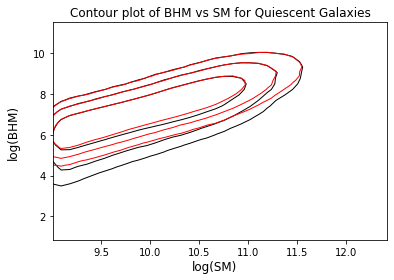

In [30]:
ques = nonetype & qu1
staf = nonetype & sf1
ques1 = no_0_3 & qu
staf1 = no_0_3 & sf

fig, ax = plt.subplots()
contour2(ax, np.log10(table994717['sm'][ques]), np.log10(table994717['bhm'][ques]))
contour2(ax, np.log10(table1['sm'][ques1]), np.log10(table1['bhm'][ques1]), colors='red')
ax.set_title('Contour plot of BHM vs SM for Quiescent Galaxies')
fig.supxlabel('log(SM)')
fig.supylabel('log(BHM)')

Text(0.02, 0.5, 'log(BHM)')

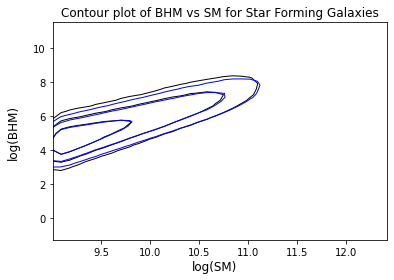

In [31]:
fig, ax = plt.subplots()
contour2(ax, np.log10(table994717['sm'][staf]), np.log10(table994717['bhm'][staf]))
contour2(ax, np.log10(table1['sm'][staf1]), np.log10(table1['bhm'][staf1]), colors='blue')
ax.set_title('Contour plot of BHM vs SM for Star Forming Galaxies')
fig.supxlabel('log(SM)')
fig.supylabel('log(BHM)')

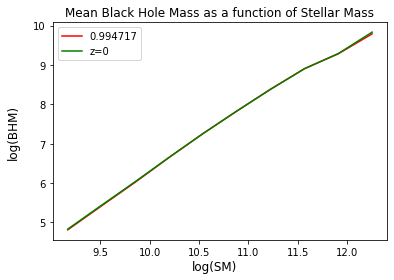

In [32]:
def avplot(ax,x,y, linecolor, nbins=10,xrange=None,linestyle='None', **kwargs):
    '''
    Plots average (mean) of y in bins of x
    Inputs:
    ax - matplotlib axis
    x, y - co-ordinates
    Optional inputs:
    nbins (default=10): number of evenly spaced bins in x to use
    xrange: defaults to min-to-max of x
    linestyle: line to plot (default is none)
    **kwargs: keywords to pass to plot routine.
    '''
    if xrange is None:
        xrange=[np.min(x),np.max(x)]
    t,l=np.histogram(x,weights=y,range=xrange,bins=nbins)
    n,l=np.histogram(x,range=xrange,bins=nbins)
    ax.plot( (l[1:]+l[0:-1])/2.0,t*1.0/n, color=linecolor)

fig1, ax1 = plt.subplots()
avplot(ax1, np.log10(table994717['sm'][nonetype]),  np.log10(table994717['bhm'][nonetype]),'red')
avplot(ax1, np.log10(table1['sm'][no_0_3]),  np.log10(table1['bhm'][no_0_3]), 'green')
ax1.set_title('Mean Black Hole Mass as a function of Stellar Mass')
fig1.supxlabel('log(SM)')
fig1.supylabel('log(BHM)')
ax1.legend(['0.994717', 'z=0'])



In [33]:
m9_9 = (halos994717['sm'] <= 10**(9.5))
m9_10 = (halos994717['sm'] > 10**(9.5)) & (halos994717['sm'] <= (1e10))
m10_10 = (halos994717['sm'] > (1e10)) & (halos994717['sm'] <= 10**(10.5))
m10_11 = (halos994717['sm'] > 10**10.5) & (halos994717['sm'] <= 1e11)
m11_11 = (halos994717['sm'] > 1e11)

In [34]:
#adds this Lbol into halos data table

table994717.add_column(0.0, name='Lbol')


#finds Lbol for all bins and adds them to the halos table

#print(table)
bol9_9 = exp_l0*0.002*np.multiply((1.3E38),(halos994717['sm'][m9_9]), dtype=np.float64)
bol9_10 = exp_l1*0.002*np.multiply((1.3E38),(halos994717['sm'][m9_10]), dtype=np.float64)
bol10_10 = exp_l2*0.002*np.multiply((1.3E38),(halos994717['sm'][m10_10]), dtype=np.float64)
bol10_11 = exp_l3*0.002*np.multiply((1.3E38),(halos994717['sm'][m10_11]), dtype=np.float64)
bol11_11 = exp_l4*0.002*np.multiply((1.3E38),(halos994717['sm'][m11_11]), dtype=np.float64)
table994717['Lbol'][m9_9] = bol9_9
table994717['Lbol'][m9_10] = bol9_10
table994717['Lbol'][m10_10] = bol10_10
table994717['Lbol'][m10_11] = bol10_11
table994717['Lbol'][m11_11] = bol11_11
#print(table)


In [35]:
#finding black hole mass growth rate and adding it to the table
constant = 3.154/(1.98847e30*(3e8**2)*0.1)
print(constant)
bhmgr = table994717['Lbol']*constant

table994717.add_column(0.0, name='bhmgr')
table994717['bhmgr'] = bhmgr
print(table994717)

1.762382356507488e-46
        id               descid          upid    ...        bhm                  Lbol                  bhmgr         
------------------ ------------------ ---------- ... ------------------ ---------------------- ----------------------
        2798830672         2811886267         -1 ...  91436391347.17653 3.3564015024703344e+43   0.005915262789308941
        2796286686         2809372245         -1 ... 15347062048.578966 1.0844776749413498e+41 1.9112643203428974e-05
        2798850500         2811905606         -1 ...  22899280992.91912 1.2070758181072183e+42 0.00021273291247990032
        2803078137         2816085895         -1 ...  2892191564.037433  6.938790536615288e+41 0.00012228802017231908
        2802920468         2815930296         -1 ... 1652741648.0316267  5.053321645001189e+42   0.000890588490890749
        2799072539         2812124832         -1 ... 10444603775.391853  2.175770883164753e+41 3.8345402162922755e-05
        2806808674         2819773

In [36]:
negatives = 0
positives = 0
for bh in table994717['bhm']:
    if bh < 0:
        negatives +=1
    else:
        positives +=1
        
print(negatives)
galaxies = len(table994717['bhm'])
fraction_neg = negatives/galaxies
print(fraction_neg)
print(positives)

2842
0.004121349227065751
686738


In [37]:
dtype = np.dtype(dtype=[('id', 'i8'),('descid','i8'),('upid','i8'),
                        ('flags', 'i4'), ('uparent_dist', 'f4'),
                        ('pos', 'f4', (6)), ('vmp', 'f4'), ('lvmp', 'f4'),
                        ('mp', 'f4'), ('m', 'f4'), ('v', 'f4'), ('r', 'f4'),
                        ('rank1', 'f4'), ('rank2', 'f4'), ('ra', 'f4'),
                        ('rarank', 'f4'), ('A_UV', 'f4'), ('sm', 'f4'), 
                        ('icl', 'f4'), ('sfr', 'f4'), ('obs_sm', 'f4'), 
                        ('obs_sfr', 'f4'), ('obs_uv', 'f4'), ('empty', 'f4')],
                 align=True)
    
    
halos987123 = np.fromfile('/disk01/jaird/data/universemachine/dr1/BP/sfr_catalog_0.987123.bin', dtype=dtype)

IGNORE_FLAG = 2**4

for x in halos987123:
    if (x['flags'] & IGNORE_FLAG):
        continue  #Ignore halos with the IGNORE_FLAG set

In [38]:
#creates mask to find values where stellar mass is greater than 10^9
mask = (halos987123['sm']>1e9)
#creates new data array for halos with stellar mass >10^9
halos987123 = halos987123[mask]

#finding lookback time and converting it into a dimensionless quantity to allow for subraction but also converting it into years
z = (1/0.987123) - 1
time_Gyr = astropy.cosmology.Planck15.lookback_time(z)
print(time_Gyr)
print(repr(time_Gyr))
time = time_Gyr *1e9/u.Gyr
print(time)

#finding matching ids

#note minus sign so sorts from high to low mass
sort = np.argsort(-halos987123['mp'])

#sorted version of halos earlier
halos987123_sorted= halos987123[sort]  
print(halos987123_sorted['sm'])

#returns first match from halos_earlier_sorted to halos_later i.e. most massive progenitor
matches, ind_earlier, ind_later = np.intersect1d(halos987123_sorted['descid'], halos994717['id'], return_indices=True)
#print(ind_earlier[0], ind_later[0])

#then can add BH mass to halos_earlier_sorted, for the most massive progenitor
table987123 = astropy.table.Table(halos987123_sorted)
table987123.add_column(0.0, name='bhm')
table987123['bhm'][ind_earlier] = table994717['bhm'][ind_later] - table994717['bhmgr'][ind_later]*time
#print(table1['bhm'][489050], table['bhm'][58762], table['bhmgr'][58762])


#print(table1['bhm'])
print(table987123)

0.1865141655968257 Gyr
<Quantity 0.18651417 Gyr>
186514165.59682572
[2.61805441e+12 2.62459884e+12 9.37678602e+11 ... 1.04363994e+09
 1.19070003e+09 1.17263360e+09]
        id               descid          upid    flags ...    obs_sfr      obs_uv   empty         bhm        
------------------ ------------------ ---------- ----- ... ------------- ---------- ----- -------------------
        2785567976         2798830672         -1   130 ...     4.2494807 -19.674246   1.0   -932969.585018306
        2782999366         2796286686         -1   130 ...     5.5200305  -19.77964   1.0   9405664864.513542
        2785588275         2798850500         -1   130 ...     1.8140085 -19.291584   1.0  -386286.7623871721
        2789695862         2802920468         -1   130 ...      0.334516  -17.87814   1.0 -1949061.5240935814
        2789855181         2803078137         -1   130 ...     2.8554385 -19.306223   1.0 -269332.63500213926
        2785812641         2799072539         -1   130 ...      1

In [39]:
negatives = 0
positives = 0
for bh in table987123['bhm']:
    if bh < 0:
        negatives +=1
    else:
        positives +=1
        
print(negatives)
galaxies = len(table987123['bhm'])
fraction_neg = negatives/galaxies
print(fraction_neg)
print(positives)

pos = (table987123['bhm'] > 0)

96896
0.14058913486957605
592318


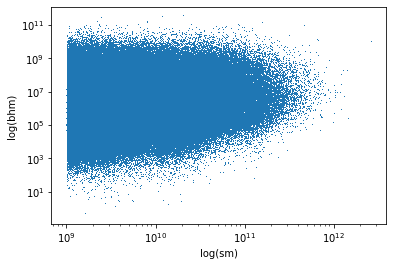

In [40]:
plt.loglog(table987123['sm'], table987123['bhm'], ',')
plt.xlabel('log(sm)')
plt.ylabel('log(bhm)')
plt.show()

In [11]:
files = ['sfr_catalog_0.334060.bin',
'sfr_catalog_0.339122.bin',
'sfr_catalog_0.344185.bin',
'sfr_catalog_0.349247.bin',
'sfr_catalog_0.354310.bin',
'sfr_catalog_0.359372.bin',
'sfr_catalog_0.364435.bin',
'sfr_catalog_0.369497.bin',
'sfr_catalog_0.374560.bin',
'sfr_catalog_0.379622.bin',
'sfr_catalog_0.384685.bin',
'sfr_catalog_0.389747.bin',
'sfr_catalog_0.394810.bin',
'sfr_catalog_0.399872.bin',
'sfr_catalog_0.404935.bin',
'sfr_catalog_0.409997.bin',
'sfr_catalog_0.415060.bin',
'sfr_catalog_0.420122.bin',
'sfr_catalog_0.425185.bin',
'sfr_catalog_0.430247.bin',
'sfr_catalog_0.435310.bin',
'sfr_catalog_0.440372.bin',
'sfr_catalog_0.445435.bin',
'sfr_catalog_0.450497.bin',
'sfr_catalog_0.455560.bin',
'sfr_catalog_0.460622.bin',
'sfr_catalog_0.465685.bin',
'sfr_catalog_0.470747.bin',
'sfr_catalog_0.475810.bin',
'sfr_catalog_0.480872.bin',
'sfr_catalog_0.485935.bin',
'sfr_catalog_0.490997.bin',
'sfr_catalog_0.496060.bin',
'sfr_catalog_0.501122.bin',
'sfr_catalog_0.506185.bin',
'sfr_catalog_0.511247.bin',
'sfr_catalog_0.516310.bin',
'sfr_catalog_0.521372.bin',
'sfr_catalog_0.526435.bin',
'sfr_catalog_0.531497.bin',
'sfr_catalog_0.536560.bin',
'sfr_catalog_0.541622.bin',
'sfr_catalog_0.546685.bin',
'sfr_catalog_0.551747.bin',
'sfr_catalog_0.556810.bin',
'sfr_catalog_0.561872.bin',
'sfr_catalog_0.566935.bin',
'sfr_catalog_0.571997.bin',
'sfr_catalog_0.577060.bin',
'sfr_catalog_0.582123.bin',
'sfr_catalog_0.587185.bin',
'sfr_catalog_0.592248.bin',
'sfr_catalog_0.597310.bin',
'sfr_catalog_0.602373.bin',
'sfr_catalog_0.607435.bin',
'sfr_catalog_0.612498.bin',
'sfr_catalog_0.617560.bin',
'sfr_catalog_0.622623.bin',
'sfr_catalog_0.627685.bin',
'sfr_catalog_0.632748.bin',
'sfr_catalog_0.637810.bin',
'sfr_catalog_0.642873.bin',
'sfr_catalog_0.647935.bin',
'sfr_catalog_0.652998.bin',
'sfr_catalog_0.658060.bin',
'sfr_catalog_0.663123.bin',
'sfr_catalog_0.668185.bin',
'sfr_catalog_0.673248.bin',
'sfr_catalog_0.678310.bin',
'sfr_catalog_0.683373.bin',
'sfr_catalog_0.690967.bin',
'sfr_catalog_0.698560.bin',
'sfr_catalog_0.706154.bin',
'sfr_catalog_0.713748.bin',
'sfr_catalog_0.721342.bin',
'sfr_catalog_0.728935.bin', 
'sfr_catalog_0.736529.bin',
'sfr_catalog_0.744123.bin',
'sfr_catalog_0.751717.bin',
'sfr_catalog_0.759310.bin',
'sfr_catalog_0.766904.bin',
'sfr_catalog_0.774498.bin',
'sfr_catalog_0.782092.bin',
'sfr_catalog_0.789685.bin',
'sfr_catalog_0.797279.bin',
'sfr_catalog_0.804873.bin',
'sfr_catalog_0.812467.bin',
'sfr_catalog_0.820060.bin',
'sfr_catalog_0.827654.bin',
'sfr_catalog_0.835248.bin',
'sfr_catalog_0.842842.bin',
'sfr_catalog_0.850435.bin',
'sfr_catalog_0.858029.bin',
'sfr_catalog_0.865623.bin',
'sfr_catalog_0.873217.bin',
'sfr_catalog_0.880810.bin',
'sfr_catalog_0.888404.bin',
'sfr_catalog_0.895998.bin',
'sfr_catalog_0.903592.bin',
'sfr_catalog_0.911185.bin',
'sfr_catalog_0.918779.bin',
'sfr_catalog_0.926373.bin',
'sfr_catalog_0.933967.bin',
'sfr_catalog_0.941560.bin',
'sfr_catalog_0.949154.bin',
'sfr_catalog_0.956748.bin',
'sfr_catalog_0.964342.bin',
'sfr_catalog_0.971935.bin',
'sfr_catalog_0.979529.bin',
'sfr_catalog_0.987123.bin',
'sfr_catalog_0.994717.bin']
files.reverse()
print(files)



['sfr_catalog_0.994717.bin', 'sfr_catalog_0.987123.bin', 'sfr_catalog_0.979529.bin', 'sfr_catalog_0.971935.bin', 'sfr_catalog_0.964342.bin', 'sfr_catalog_0.956748.bin', 'sfr_catalog_0.949154.bin', 'sfr_catalog_0.941560.bin', 'sfr_catalog_0.933967.bin', 'sfr_catalog_0.926373.bin', 'sfr_catalog_0.918779.bin', 'sfr_catalog_0.911185.bin', 'sfr_catalog_0.903592.bin', 'sfr_catalog_0.895998.bin', 'sfr_catalog_0.888404.bin', 'sfr_catalog_0.880810.bin', 'sfr_catalog_0.873217.bin', 'sfr_catalog_0.865623.bin', 'sfr_catalog_0.858029.bin', 'sfr_catalog_0.850435.bin', 'sfr_catalog_0.842842.bin', 'sfr_catalog_0.835248.bin', 'sfr_catalog_0.827654.bin', 'sfr_catalog_0.820060.bin', 'sfr_catalog_0.812467.bin', 'sfr_catalog_0.804873.bin', 'sfr_catalog_0.797279.bin', 'sfr_catalog_0.789685.bin', 'sfr_catalog_0.782092.bin', 'sfr_catalog_0.774498.bin', 'sfr_catalog_0.766904.bin', 'sfr_catalog_0.759310.bin', 'sfr_catalog_0.751717.bin', 'sfr_catalog_0.744123.bin', 'sfr_catalog_0.736529.bin', 'sfr_catalog_0.7289

In [37]:
import numpy as np
import math
print(len(files))
zlist = []
sflist = []
for filename in files:
    scalefactor = float(filename.split('sfr_catalog_')[1].split('.bin')[0])
    redshift = (1/scalefactor) - 1
    redshift = round(redshift, 3)
    scalefactor = round(scalefactor, 3)
    zlist.append(redshift)
    sflist.append(scalefactor)
    print(str(scalefactor ) + " & " +str(redshift) + " & ")
zarray = np.asarray(zlist)
sfarray = np.asarray(sflist)


111
0.995 & 0.005 & 
0.987 & 0.013 & 
0.98 & 0.021 & 
0.972 & 0.029 & 
0.964 & 0.037 & 
0.957 & 0.045 & 
0.949 & 0.054 & 
0.942 & 0.062 & 
0.934 & 0.071 & 
0.926 & 0.079 & 
0.919 & 0.088 & 
0.911 & 0.097 & 
0.904 & 0.107 & 
0.896 & 0.116 & 
0.888 & 0.126 & 
0.881 & 0.135 & 
0.873 & 0.145 & 
0.866 & 0.155 & 
0.858 & 0.165 & 
0.85 & 0.176 & 
0.843 & 0.186 & 
0.835 & 0.197 & 
0.828 & 0.208 & 
0.82 & 0.219 & 
0.812 & 0.231 & 
0.805 & 0.242 & 
0.797 & 0.254 & 
0.79 & 0.266 & 
0.782 & 0.279 & 
0.774 & 0.291 & 
0.767 & 0.304 & 
0.759 & 0.317 & 
0.752 & 0.33 & 
0.744 & 0.344 & 
0.737 & 0.358 & 
0.729 & 0.372 & 
0.721 & 0.386 & 
0.714 & 0.401 & 
0.706 & 0.416 & 
0.699 & 0.432 & 
0.691 & 0.447 & 
0.683 & 0.463 & 
0.678 & 0.474 & 
0.673 & 0.485 & 
0.668 & 0.497 & 
0.663 & 0.508 & 
0.658 & 0.52 & 
0.653 & 0.531 & 
0.648 & 0.543 & 
0.643 & 0.556 & 
0.638 & 0.568 & 
0.633 & 0.58 & 
0.628 & 0.593 & 
0.623 & 0.606 & 
0.618 & 0.619 & 
0.612 & 0.633 & 
0.607 & 0.646 & 
0.602 & 0.66 & 
0.597 & 0.674 & 
0

In [38]:
for i in range(len(zarray)):
    if (i + 82) < 111:
        print(str(sfarray[i]) + " & " +str(zarray[i]) + " & " + str(sfarray[i+41]) + " & " +str(zarray[i+41]) + " & " + str(sfarray[i+82]) + " & " +str(zarray[i+82]) + "\\" + "\\")
    else:
        if i < 41:
            print(str(sfarray[i]) + " & " +str(zarray[i]) + " & " + str(sfarray[i+41]) + " & " +str(zarray[i+41]) + "\\" + "\\")


0.995 & 0.005 & 0.683 & 0.463 & 0.476 & 1.102\\
0.987 & 0.013 & 0.678 & 0.474 & 0.471 & 1.124\\
0.98 & 0.021 & 0.673 & 0.485 & 0.466 & 1.147\\
0.972 & 0.029 & 0.668 & 0.497 & 0.461 & 1.171\\
0.964 & 0.037 & 0.663 & 0.508 & 0.456 & 1.195\\
0.957 & 0.045 & 0.658 & 0.52 & 0.45 & 1.22\\
0.949 & 0.054 & 0.653 & 0.531 & 0.445 & 1.245\\
0.942 & 0.062 & 0.648 & 0.543 & 0.44 & 1.271\\
0.934 & 0.071 & 0.643 & 0.556 & 0.435 & 1.297\\
0.926 & 0.079 & 0.638 & 0.568 & 0.43 & 1.324\\
0.919 & 0.088 & 0.633 & 0.58 & 0.425 & 1.352\\
0.911 & 0.097 & 0.628 & 0.593 & 0.42 & 1.38\\
0.904 & 0.107 & 0.623 & 0.606 & 0.415 & 1.409\\
0.896 & 0.116 & 0.618 & 0.619 & 0.41 & 1.439\\
0.888 & 0.126 & 0.612 & 0.633 & 0.405 & 1.47\\
0.881 & 0.135 & 0.607 & 0.646 & 0.4 & 1.501\\
0.873 & 0.145 & 0.602 & 0.66 & 0.395 & 1.533\\
0.866 & 0.155 & 0.597 & 0.674 & 0.39 & 1.566\\
0.858 & 0.165 & 0.592 & 0.688 & 0.385 & 1.6\\
0.85 & 0.176 & 0.587 & 0.703 & 0.38 & 1.634\\
0.843 & 0.186 & 0.582 & 0.718 & 0.375 & 1.67\\
0.835 & 0.19

In [15]:
print(np.diff(zarray))


[0.00773392 0.00785384 0.00797657 0.00810112 0.0082308  0.0083625
 0.0084974  0.00863443 0.00877714 0.00892223 0.00907095 0.0092222
 0.00937975 0.0095401  0.0097046  0.00987209 0.01004661 0.01022445
 0.01040705 0.01059317 0.01078721 0.01098516 0.01118861 0.01139625
 0.01161281 0.01183404 0.01206164 0.01229424 0.01253697 0.01278525
 0.01304099 0.0133027  0.01357599 0.01385594 0.01414464 0.01444054
 0.01474974 0.01506698 0.01539457 0.01573086 0.01608257 0.0109225
 0.01108457 0.01125476 0.01142435 0.01160241 0.01177999 0.01196643
 0.0121525  0.01234785 0.01254296 0.0127478  0.01295255 0.01316751
 0.01338253 0.01360829 0.01383429 0.01407157 0.01430931 0.01455893
 0.01480923 0.01507205 0.01533886 0.01560972 0.01589415 0.01617997
 0.01648014 0.01678205 0.01709915 0.01741837 0.0177537  0.01809158
 0.01844656 0.01880459 0.0191808  0.0195606  0.01995975 0.02036313
 0.02078715 0.02121608 0.02166707 0.02212377 0.02260408 0.02309098
 0.02360321 0.02412303 0.02467007 0.02522586 0.02581094 0.0264060

In [41]:
x=np.array([1,2,5,6,7])
xinfo=np.array([50,50,100,100,100])
y=np.array([2,4,5,7])
yinfo=np.array(['a','b','c','d'])

xy, x_ind, y_ind = np.intersect1d(x,y,return_indices=True)